In [8]:
import tensorflow as tf

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [10]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [11]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
x=df[['Height']].values
y_true=df[['Weight']].values

In [15]:
def line(x, w=0, b=0):
    return w*x+b
def mean_squared_error(y_true, y_pred):
    s=(y_true-y_pred)**2
    return np.sqrt(s.mean())

Text(0.5, 0, 'b')

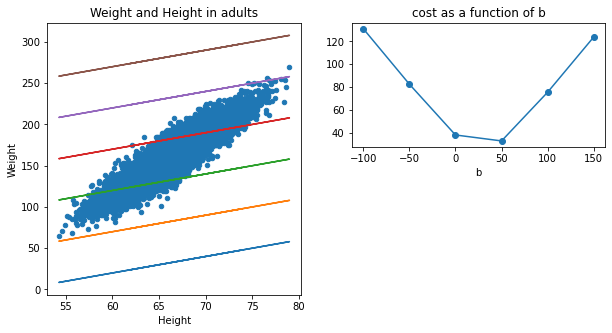

In [28]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title = 'Weight and Height in adults', ax=ax1)
bs=np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
    y_pred=line(x, w=2, b=b)
    mse=mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(x,y_pred)
    
ax2 = plt.subplot(222)
plt.plot(bs, mses, 'o-')
plt.title('cost as a function of b')
plt.xlabel('b')

#Linear Regression With Keras 

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [63]:
x

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [64]:
x.shape

(10000, 1)

In [65]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(Adam(lr=0.8), "mean_squared_error")

In [68]:
model.fit(x,y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 2ms/step - loss: 750.9787
Epoch 2/40
313/313 [==============================] - 1s 2ms/step - loss: 560.4056
Epoch 3/40
313/313 [==============================] - 0s 2ms/step - loss: 487.7154
Epoch 4/40
313/313 [==============================] - 0s 2ms/step - loss: 422.5311
Epoch 5/40
313/313 [==============================] - 0s 2ms/step - loss: 399.1700
Epoch 6/40
313/313 [==============================] - 0s 2ms/step - loss: 359.5114
Epoch 7/40
313/313 [==============================] - 1s 2ms/step - loss: 301.1354
Epoch 8/40
313/313 [==============================] - 0s 2ms/step - loss: 297.0673
Epoch 9/40
313/313 [==============================] - 1s 2ms/step - loss: 265.5723
Epoch 10/40
313/313 [==============================] - 0s 2ms/step - loss: 238.1578
Epoch 11/40
313/313 [==============================] - 1s 2ms/step - loss: 222.7235
Epoch 12/40
313/313 [==============================] - 0s 2ms/step - loss: 214.2941
E

In [70]:
y_pred=model.predict(x)

In [71]:
y_pred

array([[207.16809],
       [169.01367],
       [209.1499 ],
       ...,
       [131.9982 ],
       [170.91449],
       [117.50702]], dtype=float32)

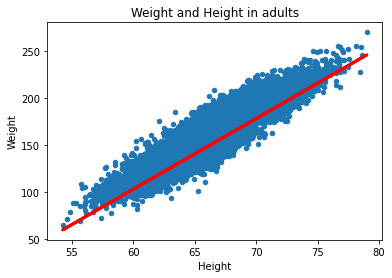

In [72]:
df.plot(kind="scatter",
x="Height",
y="Weight", title = 'Weight and Height in adults')
plt.plot(x, y_pred, color="red", linewidth=3)

In [73]:
model.predict([[200]])

array([[1157.4523]], dtype=float32)